In [1]:
from scipy.stats import hypergeom
from bioservices import QuickGO
import matplotlib.pyplot as plt
import markov_clustering as mc
import scipy.special
import networkx as nx
import pandas as pd
import numpy as np
#import igraph
import json
import copy
from scipy.misc import comb

In [2]:
def save_json(name, data):
    with open(name, "w") as f:
         json.dump(data, f)
    print("Created!!")

In [3]:
def load_json(name, data=None):
    with open(name, "r") as f:
         data = json.load(f)
    return data

In [4]:
SGI = pd.read_csv("./Seed_Genes_Intercom.csv")
I = pd.read_csv("./Intersection_Interactome.csv")
U = pd.read_csv("./Union_Interactome.csv")

In [5]:
#Graph generation
G_SGI = nx.from_pandas_edgelist(SGI, 'UniprotA', 'UniprotB')
G_I = nx.from_pandas_edgelist(I, 'UniprotA', 'UniprotB')
G_U = nx.from_pandas_edgelist(U, 'UniprotA', 'UniprotB')

In [6]:
LCC_SGI = max(nx.connected_component_subgraphs(G_SGI), key=len)
LCC_I = max(nx.connected_component_subgraphs(G_I), key=len)
LCC_U = max(nx.connected_component_subgraphs(G_U), key=len)

In [8]:
'''
@return: plot the graph
'''
def graph_visualization(G):
    posi=nx.spring_layout(G)
    plt.figure(figsize=(16, 6))
    nx.draw_networkx(G, pos=posi, edge_color="grey", node_color="c", node_size=100, linewidths=10)
    plt.grid()
    plt.show()

In [20]:
df = nx.to_pandas_edgelist(LCC_I)

In [21]:
df = df.dropna(how='any')

In [22]:
df

,source,target
12,Q7Z7L7,O00182
13,P21802,Q9Y2R2
14,O14818,P35228
15,O14818,O43353
16,O14818,Q676U5
17,P20591,P17181
18,P08047,P35228
19,O75746,P35228
20,P12829,P35228
21,Q9NWF9,O43353


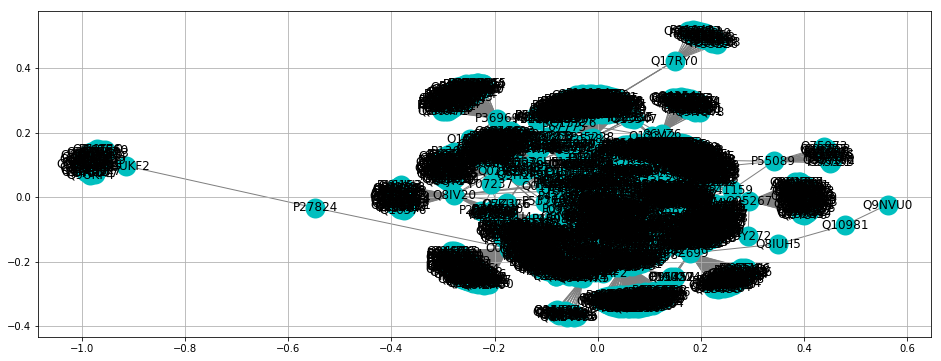

In [9]:
graph_visualization(LCC_I)

In [70]:
mapping_genes_U={i:j for i,j in enumerate(LCC_U.nodes())}
mapping_genes_I={i:j for i,j in enumerate(LCC_I.nodes())}
mapping_genes_inverse_U={j:i for i,j in enumerate(LCC_U.nodes())}

In [53]:
mapping = {"mapping_genes_U": mapping_genes_U, "mapping_genes_I": mapping_genes_I, "mapping_genes_inverse_U": mapping_genes_inverse_U}

In [71]:
mapping_genes_I

{0: nan,
 1: 'O96000',
 2: 'Q9UNE7',
 3: 'O00743',
 4: 'P62258',
 5: 'Q92750',
 6: 'Q9Y6N5',
 7: 'O14727',
 8: 'P55082',
 9: 'Q9UPY3',
 10: 'O00159',
 11: 'Q86WC4',
 12: 'Q13535',
 13: 'P17275',
 14: 'P24522',
 15: 'Q99715',
 16: 'P62136',
 17: 'Q9BX69',
 18: 'P61604',
 19: 'Q7Z6L1',
 20: 'P51861',
 21: 'Q9NQ36',
 22: 'Q7Z6Z7',
 23: 'P17066',
 24: 'P15408',
 25: 'Q13228',
 26: 'Q8WXI3',
 27: 'O43541',
 28: 'Q9Y5A7',
 29: 'Q92844',
 30: 'P42575',
 31: 'P30304',
 32: 'Q9C000',
 33: 'Q9UKF5',
 34: 'Q9UKE5',
 35: 'P13500',
 36: 'Q9NQC7',
 37: 'P20160',
 38: 'P57075',
 39: 'Q16777',
 40: 'Q96CW1',
 41: 'P13804',
 42: 'P09601',
 43: 'P09913',
 44: 'Q8WX94',
 45: 'P05113',
 46: 'Q07912',
 47: 'O95294',
 48: 'Q8WUF5',
 49: 'Q8TD84',
 50: 'Q8NB49',
 51: 'P28074',
 52: 'P14625',
 53: 'O43294',
 54: 'Q99819',
 55: 'P10966',
 56: 'P38398',
 57: 'Q7L523',
 58: 'P06239',
 59: 'P09972',
 60: 'Q15080',
 61: 'Q8TEY5',
 62: 'Q86YM7',
 63: 'Q9NS18',
 64: 'P11684',
 65: 'P04053',
 66: 'O15554',
 67: 'Q131

## 2.b Clustering methods for disease modules discovery


# MCL

In [1]:
'''
@return: cluster with Intersection and Union mapping genes
'''
def formatedCluster(cluster):
    cluster = list(cluster)
    for c in range(len(cluster)):
        cluster[c] = mapping_genes_inverse_U[mapping_genes_I[cluster[c]]]
    return cluster

In [2]:
'''
@return: markov_clustering result
'''
def MCL(G):
    matrix = nx.to_scipy_sparse_matrix(G)
    clustersResult = mc.get_clusters(mc.run_mcl(matrix))  
    return clustersResult

In [107]:
mcl_I = MCL(LCC_I)
mcl_U = MCL(LCC_U)

In [108]:
mcl_IJ={k: formatedCluster(mcl_I[k]) for k in range(len(mcl_I))}
mcl_UJ={k: mcl_U[k] for k in range(len(mcl_U))}

In [109]:
markovClusters = {"mcl_I": mcl_IJ, "mcl_U": mcl_UJ}

# Louvain

In [165]:
'''
@return: Igraph with Vertices and Edges
'''
def toIgraph(G):
    g = igraph.Graph(directed=False)
    nodes = list(set(G.nodes()))
    g.add_vertices(nodes)
    #g.add_edges(G.edges())
    edges = G.edges()
    g.add_edges(list([(str(v), str(a)) for v, a in edges if ((str(v) in nodes) and (str(a) in nodes))]))
    return g

In [166]:
'''
@return: Louvian clutering result
'''
def louvian(G):
    Gi = toIgraph(G)
    return Gi.community_multilevel()

In [167]:
louvian_I=louvian(LCC_I)
louvian_U=louvian(LCC_U)

In [168]:
louvian_U

In [193]:
louvian_IJ={k: formatedCluster(louvian_I[k]) for k in range(len(louvian_I))}
louvian_UJ={k: louvian_U[k] for k in range(len(louvian_U))}

In [173]:
louvainClusters={"louvian_I": louvian_IJ, "louvian_U": louvian_UJ}

In [174]:
save_json("mapping.json", mapping)
save_json("markov.json", markovClusters)
save_json("louvain.json", louvainClusters)

Created!!
Created!!
Created!!


## load data

In [175]:
markov=load_json("./markov.json")
louvain=load_json("./louvain.json")
mapping=load_json("./mapping.json")

In [117]:
mapping_genes_U = mapping["mapping_genes_U"]

In [118]:
mcl_U = markovClusters["mcl_U"]
mcl_I = markovClusters["mcl_I"]

In [119]:
louvian_U = louvainClusters["louvian_U"]
louvian_I = louvainClusters["louvian_I"]

# hypergeometric test

In [121]:
'''
@return: p-value
'''
def hypergeometric(k, M, n, N):
    '''
    k seed gene in sample
    M pop size
    n sample size
    N seed gene in pop
    '''
    cdf = hypergeom.cdf(k, M, n, N)
    return 1-cdf

In [241]:
se = ["Q676U5", "P55089", "Q9UNG2", "Q8N103", "7Z699", "Q13342", "Q5VWK5", "A1A4Y4", "Q9UKF2", "Q17RY0", "Q02930", "P48023", "Q10981", "P36969", "Q8N103", "P17181", "P38484", "Q8NI17", "P40189", "86VZ6", "Q8IV20", "O00182", "Q9HC29", "P35228", "Q9Y2R2", "O95267", "O43353"]
mapping_seed = {}
listOfKeys = mapping_genes_U.items()
for key in se:
    for item in listOfKeys:
        if item[1] == key:
            mapping_seed[item[0]]=key
print(dic)

{'0': 'Q676U5', '602': 'P55089', '698': 'Q9UNG2', '614': 'Q8N103', '588': '7Z699', '587': 'Q13342', '52': 'Q5VWK5', '31': 'A1A4Y4', '60': 'Q9UKF2', '73': 'Q17RY0', '78': 'Q02930', '607': 'P48023', '130': 'Q10981', '132': 'P36969', '171': 'P17181', '187': 'P38484', '216': 'P40189', '243': '86VZ6', '253': 'Q8IV20', '279': 'O00182', '23': 'Q9HC29', '381': 'P35228', '519': 'Q9Y2R2', '558': 'O95267', '357': 'O43353'}


In [242]:
seed_index=set([int(i) for i in mapping_seed.keys()])

In [243]:
'''
if value inside this confidence accept hypothesis at 95 % confidence
@return: dictionary with seed_genes, module_genes of clusterdata, p-value
'''
def hypergeometric_test(clusterData, p_value):
    d={}
    M = sum([len(clusterData[i]) for i in clusterData])
    N = sum([len(set(clusterData[i]).intersection(seed_index)) for i in clusterData])
    for i in range(len(clusterData)):
        
        module_genes=clusterData[str(i)]
        seed_genes=list(set(clusterData[str(i)]).intersection(seed_index))
        n = len(module_genes)
        k = len(seed_genes)
        p_value=hypergeometric(k, M, n, N)
        d[i] = [seed_genes, module_genes, p_value]
    return d

# putative disease modules

In [244]:
'''
@return: 
'''
def normalization_putative(data, p_value):
    putative={}
    for i in data:
        if data[i][2] < p_value:
            putative[i] = data[i]
    return putative

'''
@return: dictionary with cluster key with normalised data with p-value
'''
def putative_disease_modules(p_value=0.05):
    PutativeDMs = {}
    for cluster in [markov, louvain]:
        for c in cluster:
            k=c.split("_")[1]
            cl=cluster[c]
            d=hypergeometric_test(cl, p_value)
            putativedm=normalization_putative(d, p_value)

            PutativeDMs[c] = putativedm
    return PutativeDMs

In [245]:
PutativeDMs = putative_disease_modules(p_value=0.05)

In [246]:
save_json('pdm.json', PutativeDMs)

Created!!


In [250]:
'''
@return: normalised dataset in table formatted dictionary
'''
def routine_table(Putative, flag="I"):
    table= {"Algorithm":[], "index_module":[], "n_seed_genes":[], "n_genes":[], "seedToGene_Ratio":[],  "p_value":[]}
    
    if flag == "I":
        lista=["louvian_I", "mcl_I"]
    else:
        lista=["louvian_U", "mcl_U"]
        
    for i in lista:
        temp=Putative[i]
        keys=sorted(temp.keys())
        for k in keys:
            n_seed=len(temp[k][0])
            n_genes=len(temp[k][1])
            p_value=temp[k][2]
            if n_seed > 0:
                j=i.split("_")[0]
                if j == "louvian":
                    table["Algorithm"].append("louvain")
                elif j == "mcl":
                    table["Algorithm"].append("markov")
                table["index_module"].append(k)
                table["n_seed_genes"].append(n_seed)
                table["n_genes"].append(n_genes)
                table["seedToGene_Ratio"].append(n_seed/n_genes)
                table["p_value"].append(p_value)
    return table
        

In [251]:
table_module_I = routine_table(PutativeDMs)
table_module_U = routine_table(PutativeDMs, flag="U")

In [252]:
table_module_I=pd.DataFrame(table_module_I, columns=["Algorithm", "index_module", "n_seed_genes", "n_genes", "seedToGene_Ratio", "p_value"])
table_module_U=pd.DataFrame(table_module_U, columns=["Algorithm", "index_module", "n_seed_genes", "n_genes", "seedToGene_Ratio", "p_value"])

In [253]:
table_module_I

,Algorithm,index_module,n_seed_genes,n_genes,seedToGene_Ratio,p_value
0,louvain,6,4,163,0.024540,0.031746
1,markov,2,1,29,0.034483,0.041126
2,markov,6,1,19,0.052632,0.018545
3,markov,9,1,26,0.038462,0.033601
4,markov,10,1,31,0.032258,0.046467
5,markov,17,1,22,0.045455,0.024543
6,markov,20,1,3,0.333333,0.000363


In [254]:
table_module_U

,Algorithm,index_module,n_seed_genes,n_genes,seedToGene_Ratio,p_value
0,louvain,0,1,1,1.000000,0.000000
1,markov,7,1,31,0.032258,0.043619
2,markov,9,1,26,0.038462,0.031511
3,markov,11,1,19,0.052632,0.017367
4,markov,12,1,3,0.333333,0.000339
5,markov,14,1,29,0.034483,0.038591
6,markov,18,1,21,0.047619,0.021047
7,markov,23,1,15,0.066667,0.010952
8,markov,24,1,13,0.076923,0.008245


# 3. Enrichment

In [60]:
mcl_IKeys = [165, 888, 1345, 1557, 861, 431, 435, 438, 439, 1474, 870, 969, 1315, 587, 1435, 1535, 215, 1576, 1586, 1826, 2018, 2019, 2090, 2091, 2092, 2093, 2094, 2095, 2096]
mclI_uni = []
for key in mcl_IKeys:
    if key in mapping_genes_I:
        mclI_uni.append(mapping_genes_I[key])

165 Q96I82
888 P21333
1345 Q99835
1557 Q13114
861 Q92581
431 Q00610
435 P01236
438 P39086
439 P27708
1474 P38646
870 P42679
969 Q8NB90
1315 P52566
587 O43184
1435 P04233
1535 O94972
215 P17980
1576 P07108
1586 P04040
1826 Q04724
2018 Q9NPF7
2019 Q6GQQ9


# 4 DIAMOnD

### GO and Pathways 